#                        **DECISION TREE IMPLEMENTATION FROM SCRATCH**

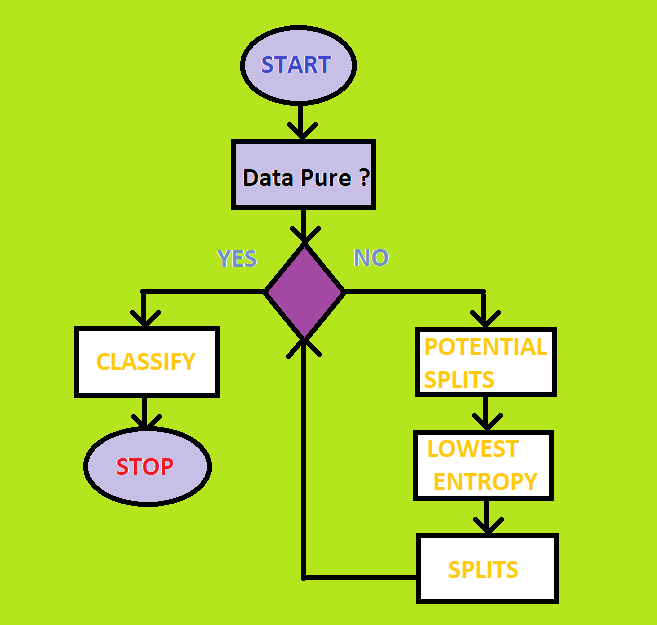

In [1]:
from IPython.core.display import Image
Image(filename=("C:/Users/Anisha Khetan/Desktop/python.png"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
import random
from pprint import pprint ## pretty print - used to print the data structures in the form that can be used by the interpreter 
                          ## to understand

## Read the csv file & drop and rename the columns

In [4]:
df = pd.read_csv('iris.csv')
df = df.drop('Id',axis = 1)
df = df.rename(columns={'Species':'label'})

In [5]:
len(df)

150

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Separating training and testing dataset
## We have 150 rows and we are randomly picking out 20 and labeling that as testing dataset

In [7]:
def train_test_split(df,test_size):
    #checks what kind of data_type it is
    if isinstance(test_size,float):
        #If the value is float needs to be converted to integer (not really required cause explicitly assigning the value)
        test_size = round(test_size*len(df))
    #converts the index values to list
    indices = df.index.tolist() # indices = list(df.index)
    #random.sample --> returns a list
    test_indices = random.sample(population = indices,k = test_size)
    print(test_indices)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df,test_df

In [8]:
#Seed is used to maintain the same value
random.seed(0)
train_df,test_df = train_test_split(df,test_size = 20)

[98, 107, 10, 66, 130, 124, 103, 77, 122, 91, 149, 55, 129, 35, 72, 24, 64, 136, 37, 79]


## We can see now that the index values are random for the first 5 values of training dataset

In [9]:
test_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


## Convert the dataframe into numpy 2D array because the computation is faster(looping)

In [10]:
data = train_df.values
data.shape

(130, 5)

In [11]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

## Data pure ? This checks if the label column has different values or not

In [12]:
def check_purity(data):
    #only the last column is taken into consideration
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    if len(unique_classes) == 1:
        return True
    else:
        return False

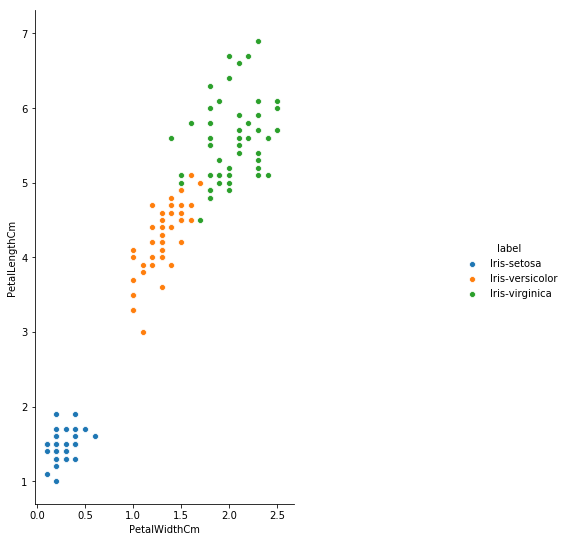

In [13]:
g =sns.pairplot(data=df,x_vars='PetalWidthCm',y_vars='PetalLengthCm',hue='label')
g.fig.set_size_inches(10,10)

## Classification of data

In [14]:
def classify_data(data):
    label_column = data[:,-1]
    unique_classes,count_unique_classes = np.unique(label_column,return_counts=True)
    #returns index of the flower name which has the maximum value
    index = count_unique_classes.argmax()
    classification = unique_classes[index]
    return classification

In [15]:
classify_data(train_df[(train_df.PetalWidthCm > 0.4) & (train_df.PetalWidthCm < 2) ].values)

'Iris-versicolor'

## Potential split ?

In [16]:
#converts the datafrome into a numpy 2D array
def get_potential_splits(data):
    potential_splits = {}
    #collect only the column values(130,5)
    _,n_columns  = data.shape ## 5
    for column_index in range(n_columns-1):
        potential_splits[column_index] = []
        values = data[:,column_index]
        unique_values = np.unique(values)
        for i in range(len(unique_values)):
            if i != 0:
                current_value = unique_values[i]
                previous_value = unique_values[i-1]
                potential_split = (current_value+previous_value)/2
                potential_splits[column_index].append(potential_split)
    return potential_splits


In [17]:
potential_splits = get_potential_splits(train_df.values)
print(potential_splits[3])

[0.15000000000000002, 0.25, 0.35, 0.45, 0.55, 0.8, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.1500000000000004, 2.25, 2.3499999999999996, 2.45]


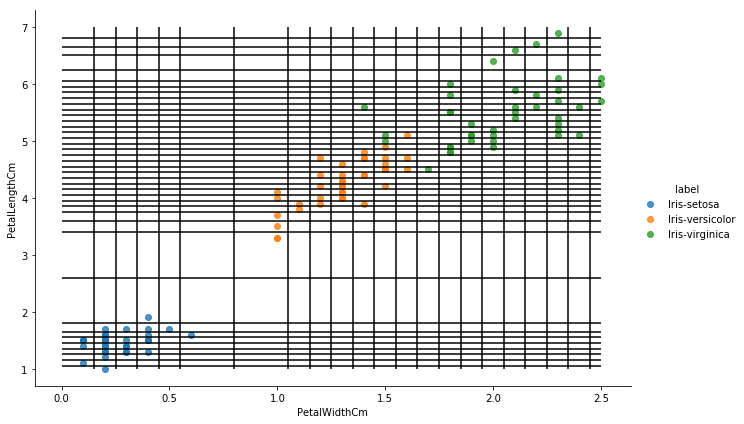

In [18]:
sns.lmplot(data=train_df,x = 'PetalWidthCm',y='PetalLengthCm',hue = 'label',fit_reg=False,height = 6 ,aspect = 1.5)
plt.vlines(x=potential_splits[3],ymin=1,ymax=7)
plt.hlines(y=potential_splits[2],xmin = 0,xmax=2.5)

## Split data

In [19]:
def split_data(data,split_column,split_value):
    split_column_values = data[:,split_column]
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    return data_below,data_above 


In [20]:
split_column = 3
split_value = 0.8
data_above,data_below = split_data(data,split_column,split_value)
print("data_above",data_above)
print("data_below",data_below)

data_above [[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 1.6 0.2 'Iris-setosa']
 [5.4 3.4 1.5 0.4 'Iris-setosa']

In [21]:
plotting_df = pd.DataFrame(data,columns = df.columns)

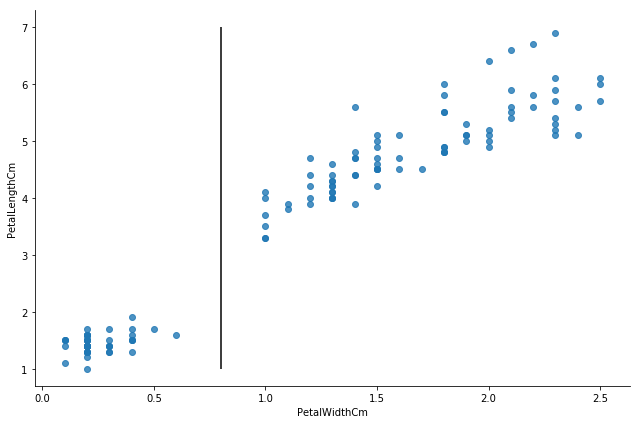

In [22]:
sns.lmplot(data=plotting_df,x = 'PetalWidthCm',y = 'PetalLengthCm',fit_reg=False,height = 6,aspect = 1.5)
plt.vlines(x = split_value,ymin = 1,ymax = 7)

## Entropy
### A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogeneous). This algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is equally divided then it has entropy of one

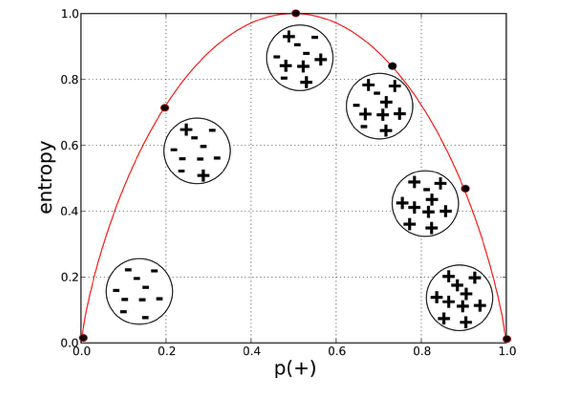

In [23]:
Image(filename=("C:/Users/Anisha Khetan/Desktop/entropy.png"))

In [24]:
def calculate_entropy(data):
    label_column = data[:,-1]
    _,counts = np.unique(label_column,return_counts=True)
    probabilities = counts/counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy

In [25]:
def calculate_overall_entropy(data_below,data_above):
    n_data_points = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points
    overall_entropy = (p_data_above * calculate_entropy(data_above)+ p_data_below * calculate_entropy(data_below))
    return overall_entropy



In [26]:
def determine_best_split(data, potential_splits):
    #best_split_column = 0
    #best_split_value = 0
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

## This is what pprint should print out 
###  example_tree =
                {"petal_width <= 0.8": [ "Iris-setosa", 
                                       {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                         "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

## Decision Tree Algorithm

In [27]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations to send in only numpy array and not dataframes
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        #print split_column, spilt_value
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [28]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


## Classification

In [29]:
example = test_df.iloc[0]
example

SepalLengthCm                5.1
SepalWidthCm                 2.5
PetalLengthCm                  3
PetalWidthCm                 1.1
label            Iris-versicolor
Name: 98, dtype: object

In [30]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [31]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)
classify_example(example, tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


'Iris-versicolor'

In [32]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, args=(tree,), axis=1)
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [33]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

0.95